In [1]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import math

from PIL import Image, ImageStat
from os.path import exists

In [2]:
def get_icon_from_item(item):
    filename = path_grid_icons + item['id'] + filename_ending_grid_icon
    if exists(filename):
        return np.asarray(Image.open(filename))
    else:
        print(f"File {filename} does not exist.")
    return []

def get_rand_item_slot():
    global all_items_df
    
    icon = []
    while len(icon) == 0:
        index = rand.randrange(len(all_items_df)) # TODO change
        item = all_items_df.iloc[index]
        icon = get_icon_from_item(item)
    
    w_index = rand.randrange(item['width'])
    h_index = rand.randrange(item['height'])
    slot_width = (int) (item['icon_width'])
    slot_height = (int) (item['icon_height'])
    
    subicon = icon[h_index*slot_height:(h_index+1)*slot_height, w_index*slot_width:(w_index+1)*slot_width]
    return index,subicon
    
def get_feature_from_img(img):
    width = img.shape[1]
    height = img.shape[0]
    r = 0;
    g = 0;
    b = 0;
    for x in range(width):
        for y in range(height):
            r += (icon[y][x])[0]
            g += (icon[y][x])[1]
            b += (icon[y][x])[2]
    r = (int) (r / (width*height))
    g = (int) (g / (width*height))
    b = (int) (b / (width*height))
    return (r,g,b)

In [3]:
# paths
path_icons = './icons/'
path_data = './data/'
path_grid_icons = './grid_icons/'

filename_ending_grid_icon = '-grid-image.jpg'

In [4]:
# load data from csv
sigma = 20
all_items_df = pd.read_csv(path_data + 'all_items.csv')
feature_dict_r = pd.read_csv(path_data + 'all_features_r_sigma_' + str(sigma) + '.csv')
feature_dict_g = pd.read_csv(path_data + 'all_features_g_sigma_' + str(sigma) + '.csv')
feature_dict_b = pd.read_csv(path_data + 'all_features_b_sigma_' + str(sigma) + '.csv')

In [5]:
# get random icon
true_index,icon = get_rand_item_slot()
feature = get_feature_from_img(icon)

# create voting vector
voting = []
for i in range(len(all_items_df)):
    voting.append(0)
    
# vote
sigma = 1
max_index = len(all_items_df)-1
# for c in feature:
#     print(c)
li = (feature_dict_r.iloc[feature[0]]['features']).strip('][').split(', ')
for index in li:
    for i in range(-sigma,sigma,1):
        if int(index)+i < 0 or int(index)+i > max_index:
            continue
        voting[int(index)+i] += 1
li = (feature_dict_g.iloc[feature[1]]['features']).strip('][').split(', ')
for index in li:
    for i in range(-sigma,sigma,1):
        if int(index)+i < 0 or int(index)+i > max_index:
            continue
        voting[int(index)+i] += 1
li = (feature_dict_b.iloc[feature[2]]['features']).strip('][').split(', ')
for index in li:
    for i in range(-sigma,sigma,1):
        if int(index)+i < 0 or int(index)+i > max_index:
            continue
        voting[int(index)+i] += 1

In [6]:
# li

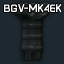

In [7]:
Image.fromarray(icon)

In [8]:
# feature_dict.iloc[100]['features']

In [9]:
indexes = []
value = 0
total = 0
# find max value
for i in range(len(voting)):
    if voting[i] > value:
        value = voting[i]
        index = i
# find all indexes with max value
for i in range(len(voting)):
    if voting[i] == value:
        total += 1
        indexes.append(i)
        
print(f"Predicted index {index} with voting {value}, total {total}")
print(f"True index is {true_index}")
print(f"Indexes: {indexes}")

Predicted index 4 with voting 6, total 639
True index is 39
Indexes: [4, 5, 20, 38, 39, 60, 63, 64, 78, 82, 94, 97, 98, 99, 100, 101, 102, 103, 117, 133, 136, 143, 144, 145, 146, 147, 148, 151, 152, 153, 163, 164, 167, 170, 171, 176, 177, 180, 205, 293, 299, 300, 303, 306, 307, 308, 309, 310, 311, 312, 313, 314, 318, 328, 329, 336, 344, 345, 346, 352, 353, 354, 355, 356, 357, 358, 359, 364, 365, 370, 376, 377, 383, 384, 385, 390, 395, 396, 400, 401, 413, 414, 415, 416, 425, 426, 431, 432, 440, 441, 442, 443, 447, 448, 449, 450, 456, 457, 458, 459, 469, 503, 504, 505, 506, 507, 510, 511, 512, 513, 514, 518, 519, 520, 521, 532, 538, 539, 540, 543, 544, 545, 553, 559, 568, 580, 581, 582, 583, 588, 589, 594, 595, 596, 600, 601, 602, 603, 621, 622, 628, 629, 632, 633, 634, 641, 651, 652, 657, 685, 688, 689, 692, 693, 694, 695, 696, 697, 698, 699, 708, 709, 710, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 732, 738, 739, 744, 751, 752, 755, 761, 771, 772, 775, 776, 783, 793, 7

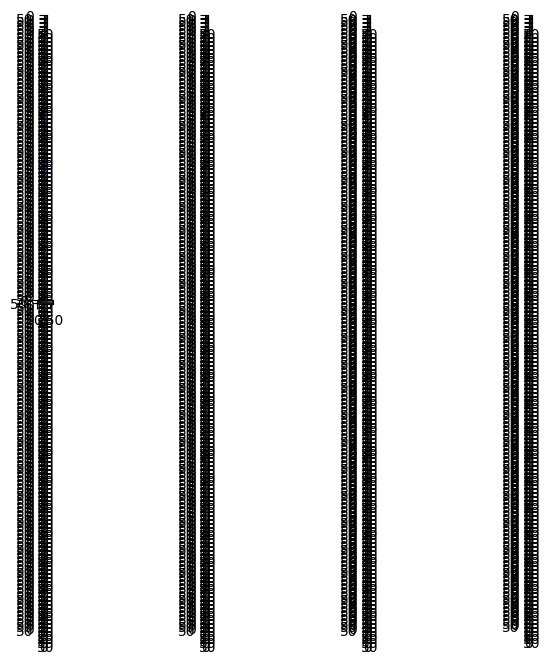

In [10]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = math.ceil(len(indexes)/4)
for i in range(len(indexes)):
    img = get_icon_from_item(all_items_df.iloc[indexes[i]])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()